<a href="https://colab.research.google.com/github/AtaruOhto/pytorch_learning/blob/master/001_pytorch_basis_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

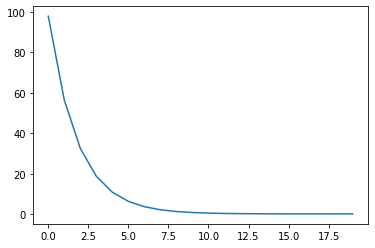

In [1]:
"""
PyTorchのnn, optimを利用
"""

import torch
from torch import nn, optim

class SampleData:
  def __init__(self):
    # データX: torch.Size([100, 3])
    X = torch.cat([torch.ones(100,1), torch.randn(100, 2)], 1)
    weight = torch.Tensor([5, 5, 5])
    # 内積を撮って、操作をしてyとする
    dot = torch.mv(X, weight)
    y = dot + torch.randn(100) * 0.5

    self.X = X
    self.y = y
    

class LinearNetwork:
  def __init__(self, data):
    X = data.X
    y = data.y
    self.losses = []

    newral_network = nn.Linear(in_features=3, out_features=1, bias=False)
    optimizer = optim.SGD(newral_network.parameters(), lr=0.1)

    # Mean Square Error 最小二条誤差
    loss_function = nn.MSELoss()

    for _ in range(20):
      # 前回のbackward()で計算された勾配の値を削除する
      optimizer.zero_grad()

      # 線形モデルでyの予測値を計算
      y_pred = newral_network(X)

      loss = loss_function(y_pred.view(y.size()), y)
    
      # lossのwによる微分を計算
      loss.backward()

      # 勾配を更新する
      optimizer.step()

      # 収束確認のためにlossを記憶しておく
      self.losses.append(loss.item())

# データを準備する
sample_data = SampleData()

# ネットワークにサンプルデータを渡して、勾配を計算する。
network = LinearNetwork(sample_data)

# maptplotlibで誤差の推移をグラフ表示する。
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(network.losses)


